In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import torch
import matplotlib.font_manager as mfm
import matplotlib as mpl
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable

from PIL import Image
import glob,os
from imageio import imread
import functions as func


In [2]:
data_dir ="./commoncharacter>1250/"
os.listdir(data_dir)[0]
names = []
for j in os.listdir(data_dir):
#     print(j, len( glob.glob(data_dir+j+"/*.png")))
    file = glob.glob(data_dir+j+"/*.png")[0]
        
    names.append(file)

In [8]:
labels = np.load("./labels.npy")

print(labels)

['一' '丁' '七' '三' '上' '下' '不' '且' '世' '中' '丸' '丹' '主' '久' '之' '九' '也' '乳'
 '乾' '了' '予' '事' '二' '云' '五' '亡' '交' '亦' '享' '京' '亭' '亮' '人' '什' '仁' '仇'
 '今' '介' '他' '付' '代' '令' '以' '仰' '仲' '件' '任' '伐' '休' '伯' '似' '但' '位' '低'
 '住' '何' '余' '作' '使' '例' '供' '侵' '便' '俊' '俗' '保' '信' '修' '倍' '倒' '候' '借'
 '停' '健' '傍' '催' '像' '元' '兄' '兆' '先' '光' '入' '全' '八' '公' '六' '共' '兵' '其'
 '具' '典' '再' '冒' '冬' '冷' '凡' '出' '函' '刀' '分' '切' '刊' '列' '初' '判' '利' '到'
 '制' '刷' '券' '刻' '前' '副' '割' '力' '功' '加' '助' '努' '勇' '勉' '勤' '勺' '包' '化'
 '北' '十' '千' '午' '半' '卒' '南' '博' '占' '印' '危' '卵' '厚' '原' '去' '又' '及' '友'
 '反' '取' '受' '口' '古' '句' '只' '召' '可' '台' '史' '右' '司' '吃' '各' '合' '同' '名'
 '后' '吐' '向' '君' '否' '含' '吸' '告' '周' '味' '呼' '命' '和' '品' '唐' '唯' '唱' '商'
 '善' '喜' '嘉' '器' '四' '回' '因' '困' '固' '土' '在' '地' '均' '垂' '型' '城' '域' '基'
 '堂' '堤' '塞' '境' '墓' '士' '夏' '夕' '外' '多' '夜' '大' '天' '太' '夫' '央' '失' '奇'
 '奉' '奏' '奔' '女' '好' '如' '妹' '妻' '始' '姐' '委']


In [9]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(8*8 * 64, 100)
        self.fc2 = nn.Linear(100, num_classes)
        
    def forward(self, x):
        
        out = self.layer1(x)
        conv_x = self.layer2[0](out)
        
        out = self.layer2(out)
        max_pool_x = out
        
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        
        out = self.fc1(out)
        out = self.fc2(out)
        
        
        return out, conv_x, max_pool_x

In [10]:
model = torch.load("./conv_network_model")
model.eval()


ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (drop_out): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=4096, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=227, bias=True)
)

In [12]:
size_IMG = 32
train_transforms = transforms.Compose([transforms.Resize(size_IMG),
                                       transforms.ToTensor(),
                                       ])

In [ ]:
k = 0
tot_conv = []
tot_pool = []
tot_vect_conv = []
L = []
for j in os.listdir(data_dir):
        file = glob.glob(data_dir+j+"/*.png")[0]

        im = Image.open(file)
#         plt.imshow(im, cmap = 'gray')
#         plt.show()

        tensorimage = train_transforms(im)

        outputs, visu_conv, visu_max_pool = model(tensorimage.view(1,1,size_IMG,size_IMG).cuda())
        
        vect_conv = visu_conv[0].view(-1).cpu().detach().numpy()
        
        tot_vect_conv.append(vect_conv) 
        tot_conv.append(visu_conv[0].cpu().detach().numpy()) 
#         tot_pool.append(visu_max_pool[0].cpu().detach().numpy())

        _, predicted = torch.max(outputs.data, 1)
        print(j, labels[predicted]==j)
        L.append(j)
        k+=1
#         if k>50: break

<Figure size 720x720 with 0 Axes>

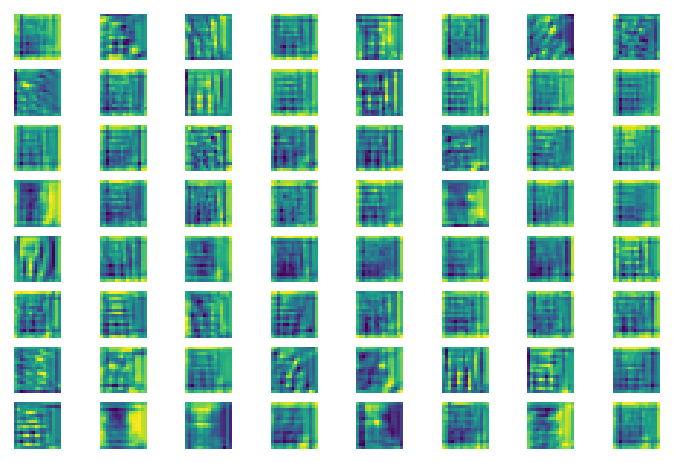

In [52]:

plt.figure(figsize = (10,10))
f, axarr = plt.subplots(8,8, sharex=True)

for i in range(8):
    for j in range(8):
        axarr[i,j].imshow(visu_conv[0][i*8+j].cpu().detach().numpy())
        axarr[i,j].axis('off')
   
    
#     plt.imshow(visu_conv[0][i].cpu().detach().numpy(), cmap = 'gray')
plt.show()

7


<Figure size 720x720 with 0 Axes>

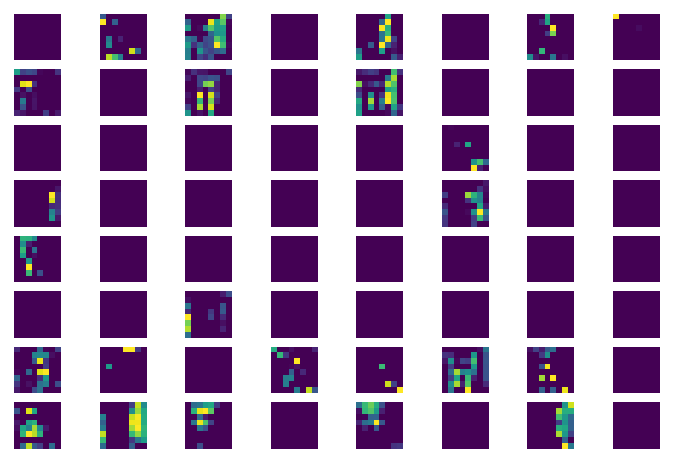

In [53]:
print(j)
plt.figure(figsize = (10,10))
f, axarr = plt.subplots(8,8, sharex=True)

for i in range(8):
    for j in range(8):
        axarr[i,j].imshow(visu_max_pool[0][i*8+j].cpu().detach().numpy())
        axarr[i,j].axis('off')
   
    
#     plt.imshow(visu_conv[0][i].cpu().detach().numpy(), cmap = 'gray')
plt.show()

In [156]:
import time
import torch
from matplotlib import pyplot as plt


use_cuda = torch.cuda.is_available()
dtype = 'float32' if use_cuda else 'float64'
torchtype = {'float32': torch.float32, 'float64': torch.float64}


def KMeans(x, K=10, Niter=10, verbose=True):
    N, D = x.shape  # Number of samples, dimension of the ambient space

    # K-means loop:
    # - x  is the point cloud,
    # - cl is the vector of class labels
    # - c  is the cloud of cluster centroids
    start = time.time()
    c = x[:K, :].clone()  # Simplistic random initialization
    x_i = x[:, None, :]  # (Npoints, 1, D)
    
    for i in range(Niter):

        c_j = c[None, :, :]  # (1, Nclusters, D)
        
        D_ij = ((x_i - c_j) ** 2).sum(-1)  # (Npoints, Nclusters) symbolic matrix of squared distances   
        cl = np.argmin(D_ij, axis = 1)  # Points -> Nearest cluster

        Ncl = torch.bincount(cl).type(torchtype[dtype])  # Class weights
        for d in range(D):  # Compute the cluster centroids with torch.bincount:
            c[:, d] = torch.bincount(cl, weights=x[:, d]) / Ncl

    end = time.time()

    if verbose:
        print("K-means example with {:,} points in dimension {:,}, K = {:,}:".format(N, D, K))
        print('Timing for {} iterations: {:.5f}s = {} x {:.5f}s\n'.format(
                Niter, end - start, Niter, (end-start) / Niter))

    return cl, c, D_ij


In [91]:
tot_vect_conv = np.array(tot_vect_conv)
tor_data = torch.from_numpy(tot_vect_conv)
print(np.shape(tot_vect_conv))

(227, 16384)


In [347]:
k = 5
cl, c, Dij = KMeans(tor_data, K=k)

K-means example with 227 points in dimension 16,384, K = 5:
Timing for 10 iterations: 3.55692s = 10 x 0.35569s



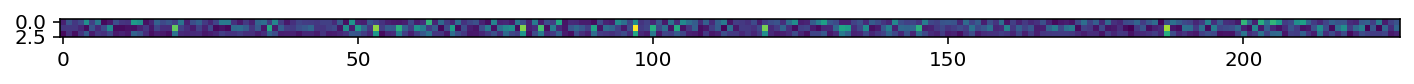

In [215]:
plt.figure(figsize = (12,5))
plt.imshow(Dij.cpu().numpy().T)

In [216]:
def distance_cent(c):
    dis_matrix = np.zeros((len(c), len(c)))
    for i in range(len(c)):
        for j in range(i+1,len(c)):
            dis_matrix[i,j] = la.norm(c[i]-c[j]) 
    return dis_matrix

In [348]:
for i in range(k):
    print("group%d:"%i, np.array(L)[np.where(cl.numpy()==i)])
    print("distance from the center:")
    print("group%d:"%i, np.round(np.sqrt(Dij[:,i]))[np.where(cl.numpy()==i)])


group0: ['何' '似' '什' '便' '信' '保' '件' '侵' '化' '仁' '但' '包' '反' '例' '公' '分' '代' '作'
 '倒' '使' '世' '也' '且' '付' '俗' '位' '后' '供' '任' '休' '丹' '伐' '句' '只' '仰' '低'
 '危' '可' '他' '倍' '住' '勺' '仲' '伯' '仇' '呼']
distance from the center:
group0: tensor([ 72.,  86.,  89.,  89.,  81.,  77.,  79.,  88.,  91., 105.,  76.,  83.,
         97.,  84.,  95.,  97.,  83.,  89.,  88.,  88.,  95.,  93.,  88.,  79.,
         78.,  75., 101.,  90.,  79.,  81., 103.,  85.,  90., 115.,  95.,  85.,
         91., 105.,  76.,  89.,  72., 107.,  84.,  90.,  86., 111.])
group1: ['刀' '之' '九' '入' '出' '丁' '十' '五' '刊' '不' '七' '元' '久' '三' '力' '二' '上' '印'
 '土' '兄' '口' '下' '天' '八' '六' '了' '士' '亡' '吐' '予' '人' '光' '北' '大' '太' '介'
 '一' '又' '云' '凡' '千' '四']
distance from the center:
group1: tensor([ 97.,  91.,  83.,  90.,  99., 104.,  91.,  95.,  94., 104.,  97.,  79.,
        100.,  97.,  91., 108.,  85., 104.,  83.,  96., 135.,  95.,  86.,  98.,
         91., 103.,  96., 101., 101., 102.,  94.,  98.,  85.,  81.,  89.,  98.,
       

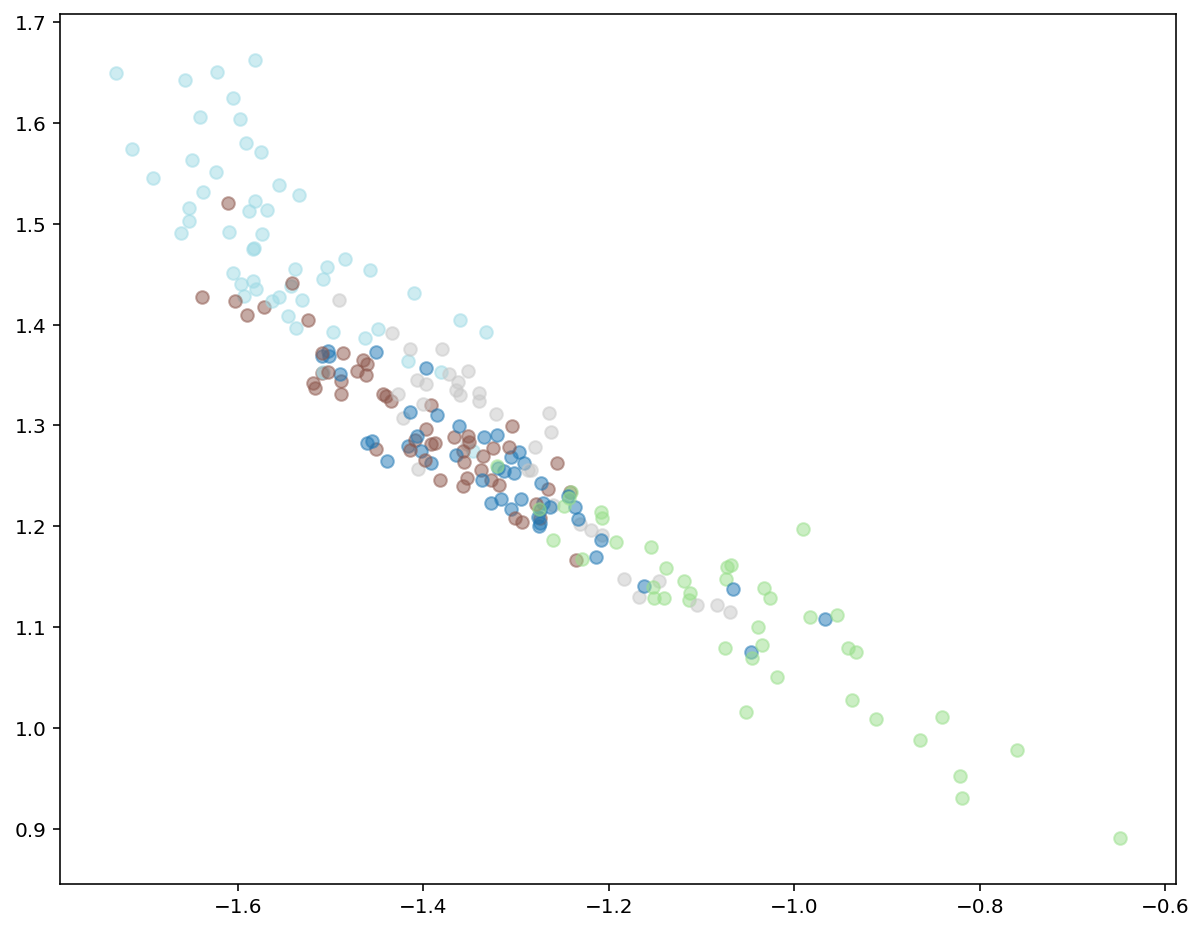

In [351]:
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
prop = mfm.FontProperties(fname=font_path)

cmap = plt.cm.get_cmap("tab20", k)
x = tor_data
plt.figure(figsize=(10,8))

for i in range(len(L)):
    clu = cl.cpu()[i].numpy()
    
    xx = np.mean(x[i, :].cpu().numpy())
    yy = np.std(x[i, :].cpu().numpy())

    
    plt.scatter(xx, yy, c = [cmap(clu)], s= 40, alpha = 0.5)
#     plt.scatter(r, theta, c = [cmap(clu)], s= 40, alpha = 0.5)
#     plt.annotate(L[i], (r, theta), fontproperties=prop, size = 12)

# plt.scatter(c[:, 0].cpu(), c[:, 1].cpu(), c='black', s=5, alpha=.8)


In [313]:
num = 3

X = tor_data

X_mean = torch.mean(X,0)
X = X - X_mean.expand_as(X)
U,S,V = torch.svd(torch.t(X))
C = torch.mm(X,U[:,:num])



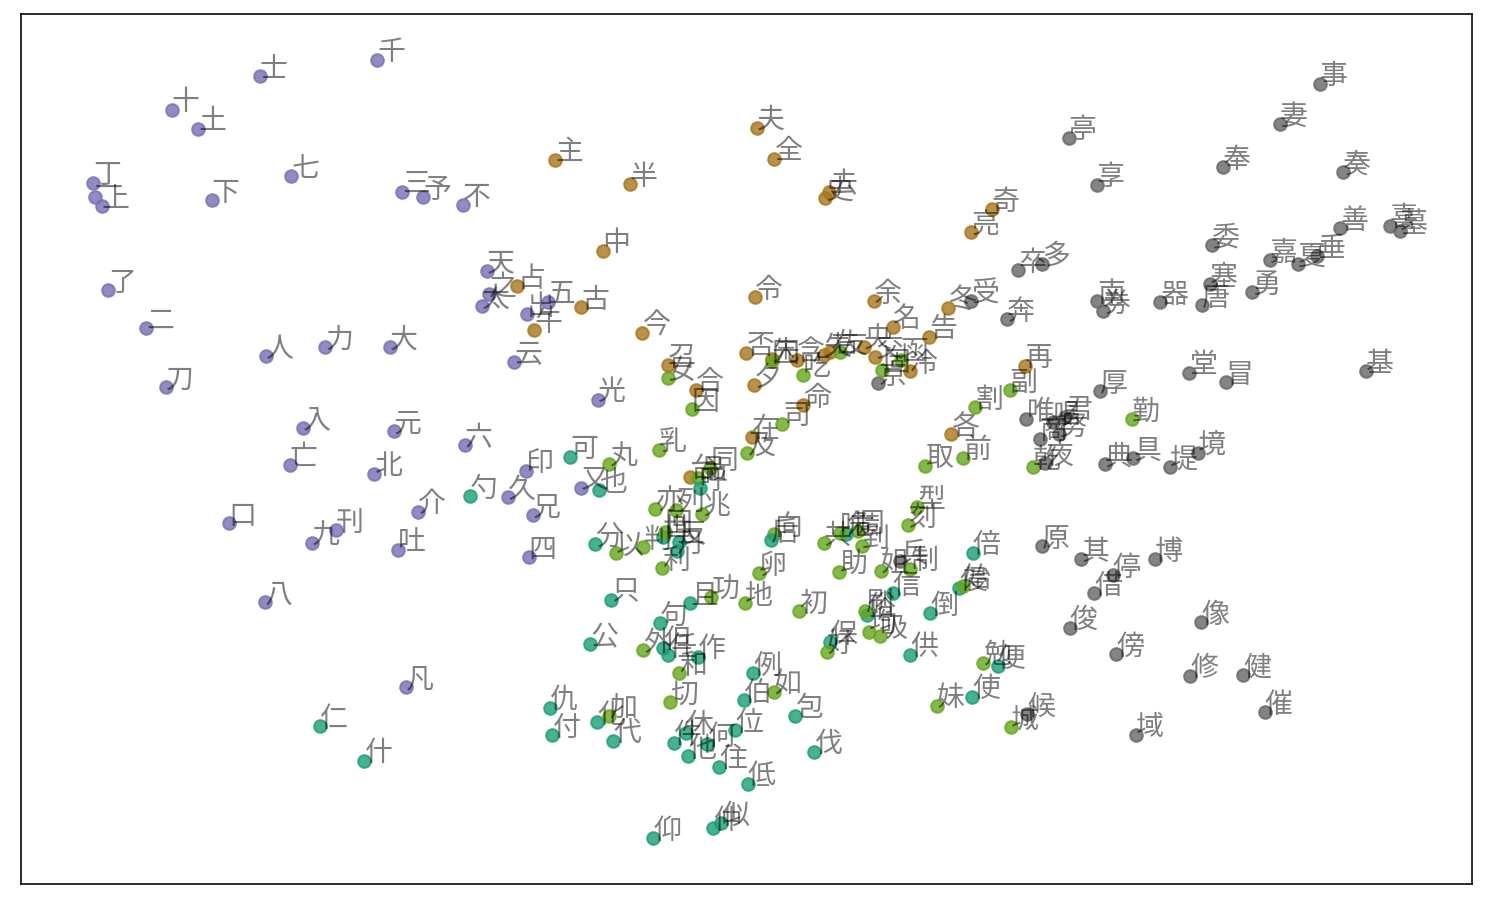

In [352]:
plt.figure(figsize=(13,8))
cmap = plt.cm.get_cmap("Dark2", k)
for i in range(len(C)):
    plt.scatter(C.cpu()[i,0], C.cpu()[i,1], c = [cmap(cl.cpu()[i].numpy())], 
                s= 40, alpha = 0.8)
    plt.annotate(L[i], (C.cpu()[i,0], C.cpu()[i,1]), fontproperties=prop, size = 14, alpha = 0.5)

plt.xticks([],[])
plt.yticks([],[])
plt.savefig("./cluster_results.png")

In [309]:
C.shape

torch.Size([227, 3])

0.0691332


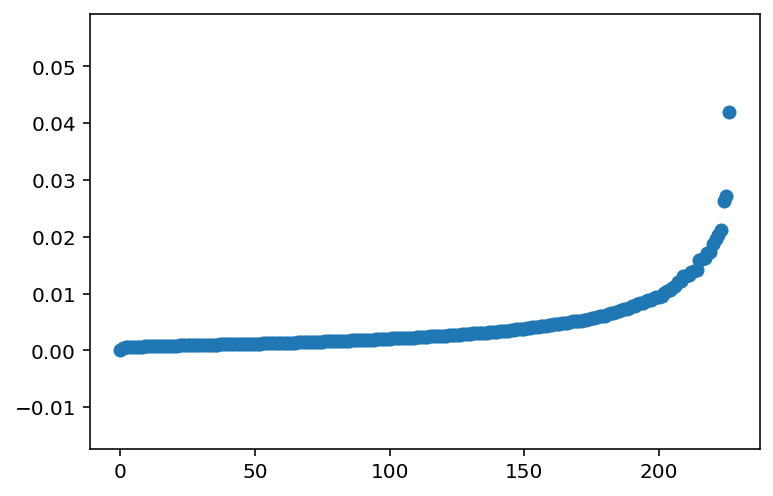

In [315]:
plt.scatter(range(len(S)), np.sort(S/S.sum()))
print(np.sum(np.sort(S/S.sum())[-2:]))
plt.show()


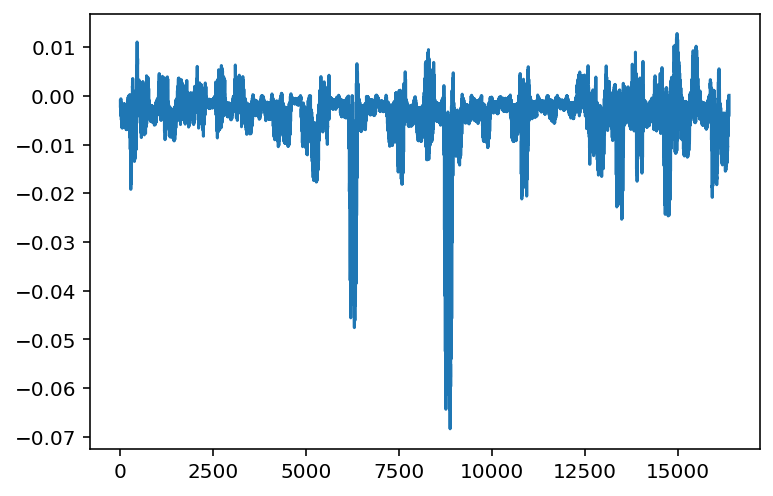

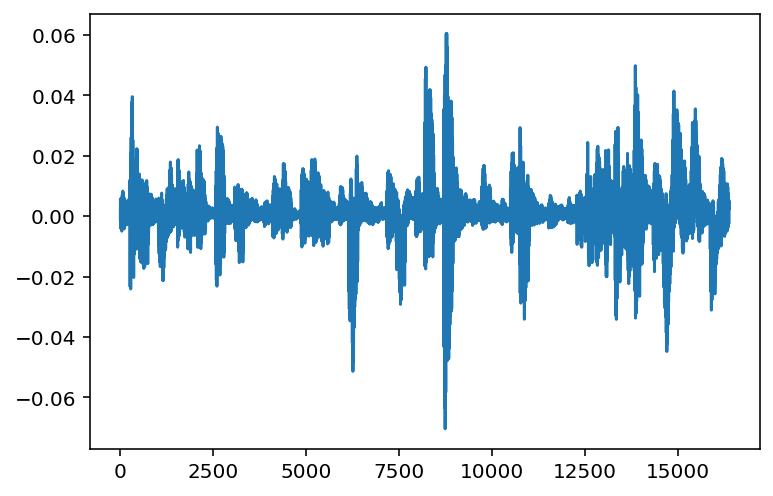

In [308]:
plt.plot(U[:,0])
plt.show()
plt.plot(U[:,1])